# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [6]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb
import pandas as pd

## Challenge 1

#### The data we will use in this challenge is:

In [7]:
x = np.arange(0,100)
y = x*2
z = x**2
print(x)
print(y)
print(z)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70
  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106
 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142
 144 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178
 180 182 184 186 188 190 192 194 196 198]
[   0    1    4    9   16   25   36   49   64   81  100  121  144  169
  196  225  256  289  324  361  400  441  484  529  576  625  676  729
  784  841  900  961 1024 1089 1156 1225 1296 1369 1444 1521 1600 1681
 1764 1849 1936 2025 2116 2209 2304 2401 2500 2601 2704 2809 2916 3025
 31

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

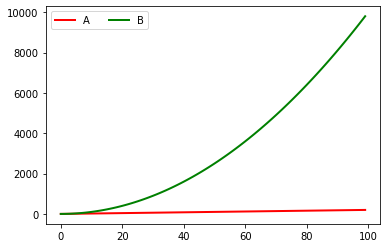

In [8]:
# Method 1
plt.plot(x,y, 'r', label = 'Line 1', linewidth=2)
plt.plot(x,z, 'g', label ='Line 2',  linewidth=2)
plt.legend('AB', ncol=2, loc='upper left')
plt.show()


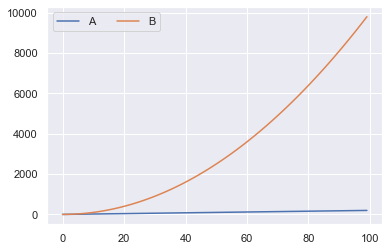

In [9]:
#Method 2
sb.set()
plt.plot(x,y)
plt.plot(x,z)
plt.legend('AB', ncol=2, loc='upper left')
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

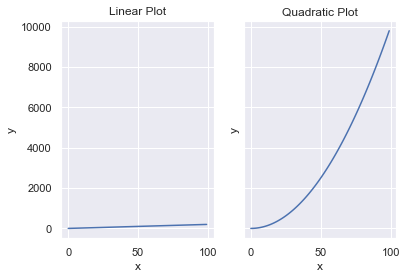

In [10]:
fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols = 2, sharey = 'row') #Create the fig
ax1.plot(x,y)
ax1.set_title('Linear Plot')   
ax1.set_xlabel('x')     
ax1.set_ylabel('y')   

ax2.plot(x,z)
ax2.set_title('Quadratic Plot')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

Text(0, 0.5, 'y')

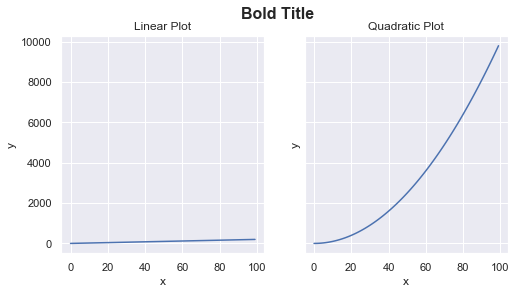

In [11]:
# your code here
fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols = 2, sharey = 'row', figsize=(8,4))
fig.suptitle('Bold Title', fontsize=16, fontweight='bold')
ax1.plot(x,y)
ax1.set_title('Linear Plot')   
ax1.set_xlabel('x')     
ax1.set_ylabel('y')   

ax2.plot(x,z)
ax2.set_title('Quadratic Plot')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

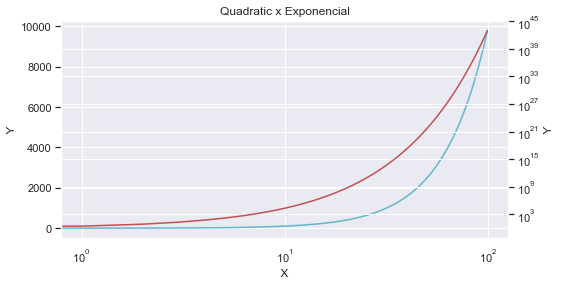

In [12]:
#Figure
fig, ax1 = plt.subplots(figsize=(8,4))   #figsize(width(x) and height)

# Functions
x = np.arange(0,100)
y = x**2 
z = np.exp(x)

# Y
ax1.plot(x, y, 'c', label='Quadratic')
ax1.set_ylabel(" Y ")
ax1.set_xlabel(" X ")

ax2 = ax1.twinx()

# Z
ax2.plot(x, z, 'r', label ='Exponencial')
ax2.set_ylabel(" Y ")
ax2.set_xlabel(" X ")
ax2.set_title('Quadratic x Exponencial')

# Scale
ax1.set_xscale("linear") 
ax1.set_yscale("linear")
ax2.set_xscale("log") 
ax2.set_yscale("log")

plt.show()


#### As a bonus challenge, try to add a legend to the plot.

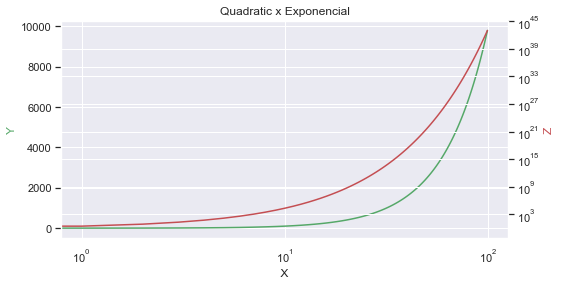

In [13]:
#Figure
fig, ax1 = plt.subplots(figsize=(8,4))   #figsize(width(x) and height)
# Functions
x = np.arange(0,100)
y = x**2 
z = np.exp(x)

# Y
ax1.plot(x, y, 'g', label='Quadratic')
ax1.set_ylabel("Y", color = 'g')
ax1.set_xlabel(" X ")
ax2 = ax1.twinx()

# Z
ax2.plot(x, z, 'r', label ='Exponencial')
ax2.set_ylabel("Z", color = 'r')
ax2.set_xlabel(" X ")
ax2.set_title('Quadratic x Exponencial')

# Scale
ax1.set_xscale("linear") 
ax1.set_yscale("linear")
ax2.set_xscale("log") 
ax2.set_yscale("log")

plt.show()


## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [14]:
fitbit = pd.read_csv('Fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

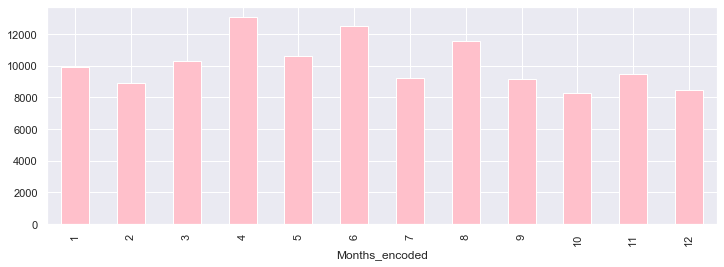

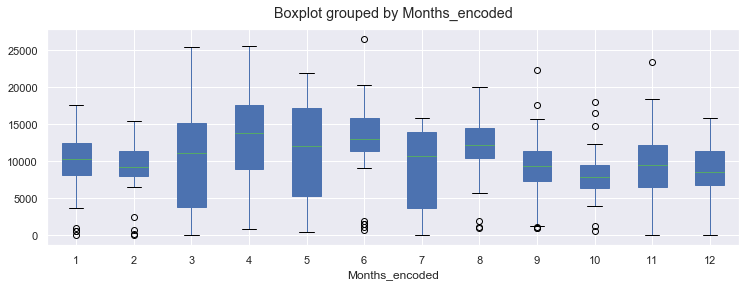

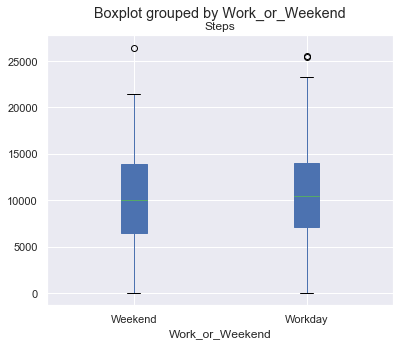

In [15]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

######################################### Average Steps ######################################################################

average_steps = fitbit.groupby(["Months_encoded"])["Steps"].mean()
months = [1,2,3,4,5,6,7,8,9,10,11,12]

# Create Fig
fig, ax = plt.subplots(figsize=(12,4))
average_steps.plot.bar(color="pink")

#Save
plt.savefig("figures/fig1.png")


######################################### MEDIAN STEPS BY MONTH_ENCODED ###################################################
# Create Figure
fig, ax = plt.subplots(figsize=(12,4))

# Create Boxplots
month_steps = fitbit.boxplot(column=["Steps"],by="Months_encoded", patch_artist=True, ax=ax)

# Return the `.Figure` instance the artist belongs to.
month_steps.get_figure().gca().set_title("")

# # Save the figure
fig.savefig('figures/fig2.png', bbox_inches='tight')

######################################## MEDIAN STEPS BY WORK_OR_WEEKEND ###################################################
# Create Figure
fig, ax = plt.subplots(figsize=(6,5))

# Create Boxplots
week_steps = fitbit.boxplot(column=["Steps"],by="Work_or_Weekend", patch_artist=True, ax=ax)
ax.set_xticklabels(['Weekend', 'Workday'])
   
plt.show()
    
# Return the `.Figure` instance the artist belongs to.
week_steps.get_figure().gca().set_title("")

# # Save the figure
fig.savefig('figures/fig3.png', bbox_inches='tight')


#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

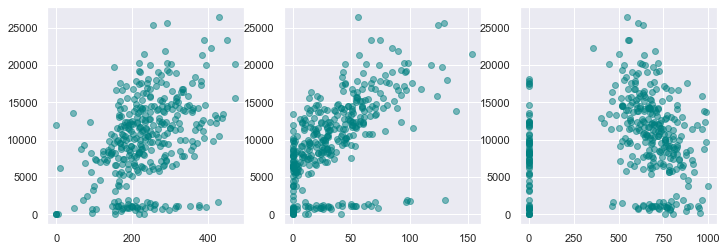

In [16]:
fig,axs = plt.subplots(1,3,figsize = (12,4))

levels = ['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary']

for i,n in zip(range(len(levels)),levels):
    axs[i].scatter(fitbit[n], fitbit['Steps'], alpha=0.5, color='teal')

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [17]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [18]:
# titanic.info()
# titanic.shape
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [19]:
# NUMERICAL VARIABLES
titanic_numerical = titanic.select_dtypes(exclude=['object'])
titanic_numerical.head()
titanic_numerical.shape

(1309, 7)

In [20]:
# CATEGORICAL VARIABLES
titanic_categorical = titanic.select_dtypes(include=['object'])
titanic_categorical.head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [21]:
sb.set(style='whitegrid')
fig = plt.figure(figsize=(12,6))
plt.show(fig)

<Figure size 864x432 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

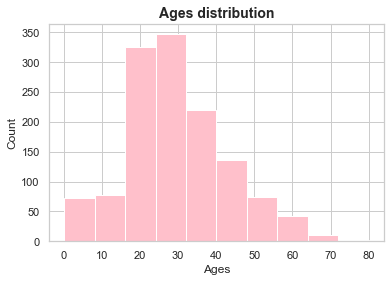

In [22]:
#plot
x = titanic['Age']
ax = plt.hist(x, color = 'pink')

plt.title('Ages distribution', fontsize=14, fontweight='bold')
plt.xlabel('Ages') 
plt.ylabel('Count')
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

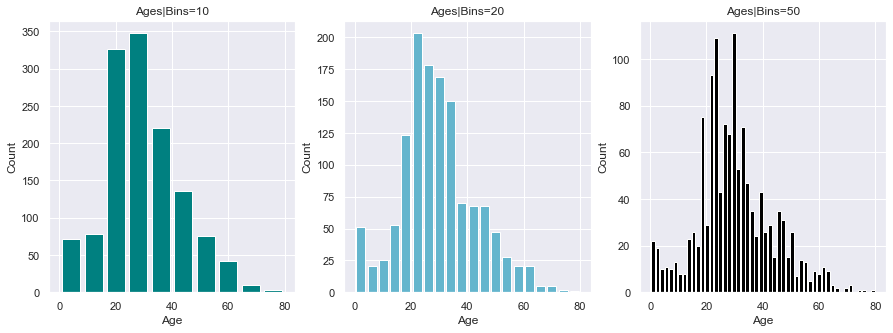

In [23]:
sb.set()
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(15,5))

labels = ['Ages|Bins=10', 'Ages|Bins=20','Ages|Bins=50']
colors = ['teal', 'c', 'black']
bins = [10,20,50]

for ax, title, color, abin in zip(axes.flat, labels, colors, bins):
    ax.hist(titanic['Age'], bins = abin ,rwidth=0.8, color= color)
    ax.set_title(title)
    ax.set_ylabel('Count')
    ax.set_xlabel('Age')

#### How does the bin size affect your plot?

In [24]:
"""
The number of bins affects the appearance of the graphics. 
The greater the number of the range, the more refined the graph will be and this can make interpretation difficult.
As well, for very small intervals, the data may not be well represented.
"""

'\nThe number of bins affects the appearance of the graphics. \nThe greater the number of the range, the more refined the graph will be and this can make interpretation difficult.\nAs well, for very small intervals, the data may not be well represented.\n'

#### Use seaborn to show the distribution of column `Age`.

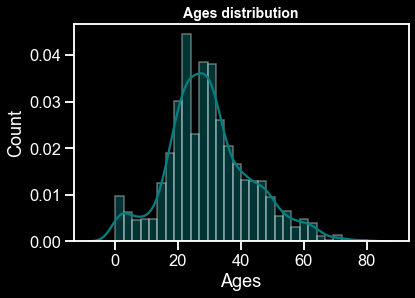

In [25]:
#plot
sb.set(style="ticks", context="talk")
plt.style.use("dark_background")

x = titanic['Age']
ax = sb.distplot(x, color = 'teal')

ax.set_xlabel("Ages")
ax.set_ylabel("Count")
ax.set_title('Ages distribution', fontsize=14, fontweight='bold')
                    
plt.show()

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

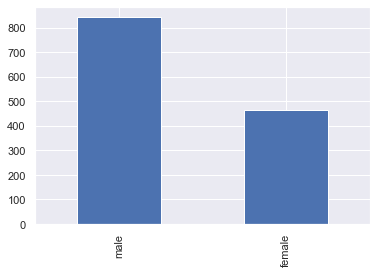

In [26]:
# Method 1 - matplotlib
sb.set()
x = titanic['Gender'].value_counts().plot.bar()


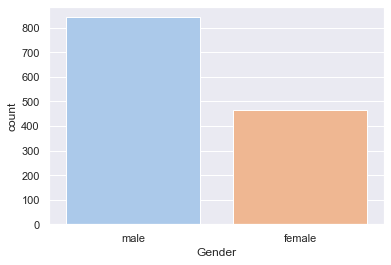

In [27]:
# Method 2 - seaborn
x = titanic['Gender']
sb.countplot(x, palette='pastel')

#### Use the right plot to visualize the column `Pclass`.

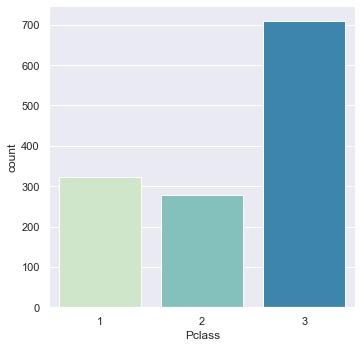

In [28]:
titanic_numerical.head()
ax = sb.catplot(x="Pclass", kind="count", data=titanic, palette='GnBu')
# ax.set_xlabel("Passenger Class")
# ax.set_ylabel("Number of Passengers")
# ax.set_title('Passengers per class', fontsize=14, fontweight='bold')

plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

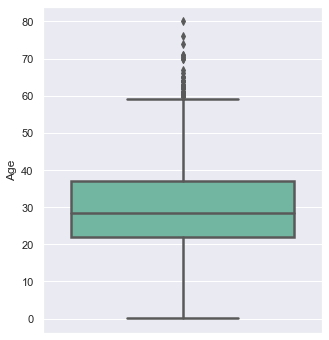

In [29]:
fig = plt.figure(figsize=(5,6))
sb.set()

sb.boxplot(y='Age', data=titanic, palette="Set2", linewidth=2.5)

In [30]:
"""
Boxplot because shows the distribution of quantitative data, divided in quartiles  + median value.
"""

'\nBoxplot because shows the distribution of quantitative data, divided in quartiles  + median value.\n'

#### What does the last plot tell you about the feature `Age`?

In [31]:
"""
Considering the position of median, the data is almost simetric.
The median age is 28.
The maximun age is close to 60 (Desconsidering the outliers).
The minimum age is 0. something.
"""

'\nConsidering the position of median, the data is almost simetric.\nThe median age is 28.\nThe maximun age is close to 60 (Desconsidering the outliers).\nThe minimum age is 0. something.\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

Text(0.5, 1.0, 'Ages Distribuiton')

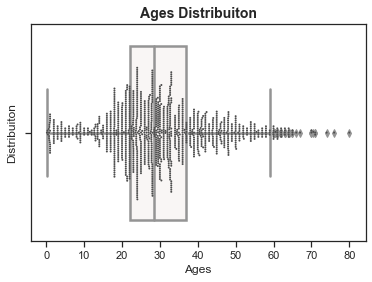

In [61]:
sns.set(style="ticks")
ax = sns.boxplot(x="Age", data=titanic, linewidth=2.5, palette='vlag')
ax = sns.swarmplot(x="Age", data=titanic,
              size=2, color=".3", linewidth=0)

ax.set_xlabel("Ages")
ax.set_ylabel("Distribuiton")
ax.set_title('Ages Distribuiton', fontsize=14, fontweight='bold')
# sns.despine(trim=True, left=True)

#### What additional information does the last plot provide about feature `Age`?

In [33]:
"""
The major part of ages are concentrated between 15 and 55.
"""

'\nyour comments here\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

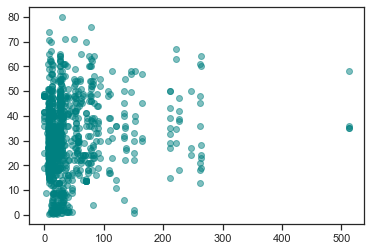

In [68]:
# Method 1 - matplotlib
ax = plt.scatter(x='Fare', y='Age', data=titanic,alpha=0.5, color='teal')

# plt.show(ax)

Text(0.5, 1, 'Ages Distribuiton')

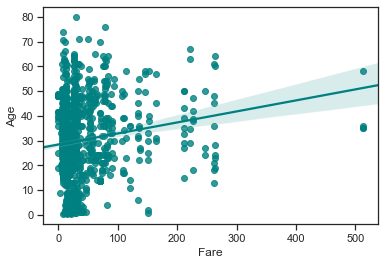

In [65]:
# Method 2 - seaborn
sns.regplot(x="Fare", y="Age", data=titanic, color='teal')

# sns.despine(offset=10, trim=True);

#### Plot the correlation matrix using seaborn.

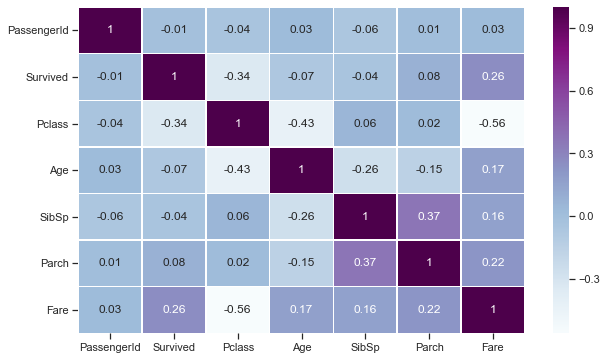

In [84]:
plt.figure(figsize=(10,6))
correlation = titanic.corr(method='pearson').round(2)
sns.heatmap(correlation, annot=True, linewidths=.5, cmap="BuPu")

#### What are the most correlated features?

In [37]:
"""
SibSp x Parch
"""

'\nyour comments here\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

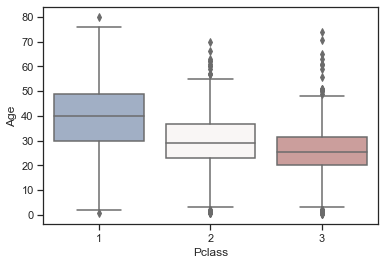

In [109]:

sns.boxplot(x='Pclass', y='Age', data=titanic, palette='vlag')
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

<Figure size 720x432 with 0 Axes>

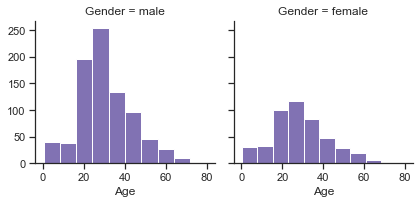

In [114]:
plt.figure(figsize=(10,6))
g = sns.FacetGrid(titanic, col='Gender')
g = g.map(plt.hist, "Age", color="m")